In [ ]:
!pip uninstall -y numpy pandas scikit-learn gensim
!pip install --no-cache-dir --force-reinstall numpy==1.26.4

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 131.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.48.0 requires pandas, which is not installed.
shap 0.48.0 requires scikit-learn, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
mizani 0.13.5 requires pandas>=2.2.0, which is not installed.
cufflinks 0.17.3 requires pandas>=0.19.2, which is not installed.
librosa 0.11.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.1 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [3]:
!pip install --no-cache-dir --force-reinstall pandas scikit-learn gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 130.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 169.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 242.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 229.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 199.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 194.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 192.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 320.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 212.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 307.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 330.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import multiprocessing
from sklearn.manifold import TSNE
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import plotly.graph_objects as go
import plotly.express as px

## Utils

Tomados de [repositorio original](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/blob/main/clase_2/jupyter_notebooks/2c%20-%20Custom%20embedding%20con%20Gensim.ipynb)

In [5]:
def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [45]:
LOSSES = []

class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        cur_loss = loss if self.epoch==0 else loss-self.loss_previous_step
        print(f'Loss after epoch {self.epoch:>2}: {cur_loss}')
        self.epoch += 1
        self.loss_previous_step = loss
        LOSSES.append(cur_loss)

## Datos y preprocesamiento

In [7]:
!wget songs_dataset.zip https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
!unzip -q songs_dataset.zip

--2025-09-06 18:49:33--  http://songs_dataset.zip/
Resolving songs_dataset.zip (songs_dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘songs_dataset.zip’
--2025-09-06 18:49:33--  https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip [following]
--2025-09-06 18:49:34--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [8]:
os.listdir("./songs_dataset/")

['bruno-mars.txt',
 'rihanna.txt',
 'nicki-minaj.txt',
 'johnny-cash.txt',
 'kanye.txt',
 'missy-elliott.txt',
 'drake.txt',
 'r-kelly.txt',
 'joni-mitchell.txt',
 'nickelback.txt',
 'radiohead.txt',
 'lil-wayne.txt',
 'lin-manuel-miranda.txt',
 'alicia-keys.txt',
 'amy-winehouse.txt',
 'al-green.txt',
 'blink-182.txt',
 'britney-spears.txt',
 'lady-gaga.txt',
 'prince.txt',
 'patti-smith.txt',
 'Lil_Wayne.txt',
 'bob-marley.txt',
 'bieber.txt',
 'cake.txt',
 'kanye-west.txt',
 'disney.txt',
 'beatles.txt',
 'bjork.txt',
 'adele.txt',
 'michael-jackson.txt',
 'janisjoplin.txt',
 'ludacris.txt',
 'bob-dylan.txt',
 'dickinson.txt',
 'nirvana.txt',
 'bruce-springsteen.txt',
 'leonard-cohen.txt',
 'Kanye_West.txt',
 'paul-simon.txt',
 'dj-khaled.txt',
 'dolly-parton.txt',
 'dr-seuss.txt',
 'eminem.txt',
 'lorde.txt',
 'nursery_rhymes.txt',
 'notorious_big.txt',
 'notorious-big.txt',
 'jimi-hendrix.txt']

In [9]:
BAND = 'eminem'

df = pd.read_csv(f'songs_dataset/{BAND}.txt', sep='/n', header=None)
print("Cantidad de documentos:", df.shape[0])

df.head()

Cantidad de documentos: 6812


/tmp/ipython-input-4170734603.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'songs_dataset/{BAND}.txt', sep='/n', header=None)


,0
0,"Look, I was gonna go easy on you and not to hu..."
1,But I'm only going to get this one chance
2,"Something's wrong, I can feel it (Six minutes,..."
3,"Just a feeling I've got, like something's abou..."
4,"If that means, what I think it means, we're in..."


In [10]:
sentence_tokens = []

for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

## 1) Creación de vectores vía Gensim

In [46]:
w2v_model = Word2Vec(
    min_count=5,     # frecuencia mínima de palabra para incluirla en el vocabulario
    window=5,        # cant de palabras antes y desp de la predicha
    vector_size=500, # embed_dim
    negative=20,     # numero de neg samples
    workers=1,       # numero de cores
    sg=1             # modelo 0:CBOW  1:skipgram
)

In [47]:
w2v_model.build_vocab(sentence_tokens)

In [48]:
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 6812


In [49]:
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 1347


In [50]:
w2v_model.train(
    sentence_tokens,
    total_examples=w2v_model.corpus_count,
    epochs=100,
    compute_loss = True,
    callbacks=[callback()]
)

Loss after epoch  0: 706679.75
Loss after epoch  1: 544442.875
Loss after epoch  2: 507125.625
Loss after epoch  3: 475668.75
Loss after epoch  4: 431549.25
Loss after epoch  5: 420625.25
Loss after epoch  6: 414382.25
Loss after epoch  7: 410649.0
Loss after epoch  8: 397916.25
Loss after epoch  9: 368341.0
Loss after epoch 10: 367184.5
Loss after epoch 11: 366692.5
Loss after epoch 12: 360845.0
Loss after epoch 13: 357679.0
Loss after epoch 14: 355578.0
Loss after epoch 15: 353140.5
Loss after epoch 16: 353931.0
Loss after epoch 17: 352237.5
Loss after epoch 18: 348418.0
Loss after epoch 19: 343088.0
Loss after epoch 20: 332783.0
Loss after epoch 21: 323057.0
Loss after epoch 22: 320919.0
Loss after epoch 23: 320856.0
Loss after epoch 24: 317299.0
Loss after epoch 25: 316783.0
Loss after epoch 26: 319168.0
Loss after epoch 27: 315311.0
Loss after epoch 28: 312598.0
Loss after epoch 29: 317544.0
Loss after epoch 30: 315861.0
Loss after epoch 31: 314436.0
Loss after epoch 32: 309282.0


(3928151, 6483800)

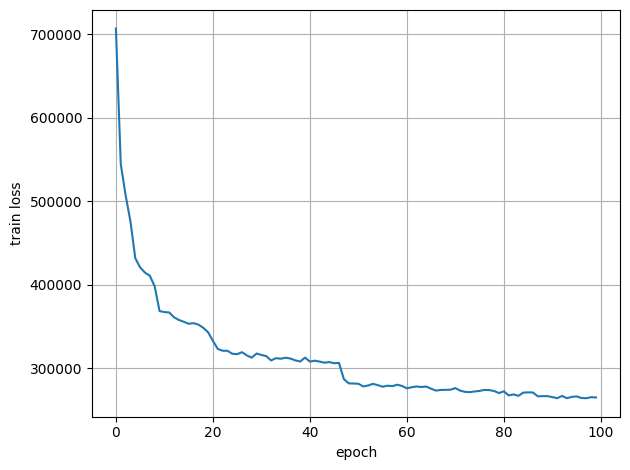

In [53]:
plt.plot(LOSSES)
#plt.xticks(list(range(len(LOSSES))))
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.grid(True)
plt.tight_layout()

## 2) Análisis de similitudes sobre términos interesantes

In [54]:
# términos más similares de 'jerbo', término que podría sonar inesperado si uno no conoce la canción "fack"
w2v_model.wv.most_similar(positive=["gerbil"], topn=10)

[('tube', 0.8348559141159058),
 ('shove', 0.714268147945404),
 ('space', 0.4962444603443146),
 ('bang', 0.4631466567516327),
 ('holding', 0.4496571719646454),
 ('shake', 0.4441472291946411),
 ('lighters', 0.4416087865829468),
 ('walked', 0.4409633278846741),
 ('metal', 0.4369065463542938),
 ('miles', 0.4352365732192993)]

Efectivamente todas "cuestiones" tratadas en la canción mencionada.

In [55]:
# términos más similares a 'love', tópico de controversia con eminem
w2v_model.wv.most_similar(positive=["love"], topn=10)

[('kicking', 0.34581291675567627),
 ('ladies', 0.3418879508972168),
 ('devil', 0.33431294560432434),
 ('living', 0.3229701817035675),
 ('somebody', 0.31971192359924316),
 ('compares', 0.3193514049053192),
 ('showed', 0.3155193626880646),
 ('p', 0.31062832474708557),
 ('goodbye', 0.30659428238868713),
 ('ugly', 0.30251750349998474)]

In [56]:
# otra vez 'love' pero con términos más disímiles
w2v_model.wv.most_similar(negative=["love"], topn=10)

[('coming', 0.04288966953754425),
 ('box', 0.039870575070381165),
 ('whole', 0.019536910578608513),
 ('standing', 0.01059561688452959),
 ('tank', 0.0036149092484265566),
 ('himself', 0.00011766456736950204),
 ('great', -0.00024732601013965905),
 ('clear', -0.002662833547219634),
 ('gas', -0.0029984000138938427),
 ('ready', -0.0066373711451888084)]

Muy al estilo de eminem, términos similares a 'love' son relacionados a las mujeres y a los problemas de relaciones interpersonales. Los más disímiles parecen asociados a autorrealización. Resulta interesante cómo resalta la postura de Eminem en muchas canciones de "los demás traen problemas" vs "foco en mi mismo".

In [84]:
# términos más disímiles
w2v_model.wv.most_similar(positive=["drugs"], topn=10)

[('lots', 0.5306333303451538),
 ('loved', 0.4523138999938965),
 ('valium', 0.4478413164615631),
 ('purple', 0.44287237524986267),
 ('loves', 0.4389994442462921),
 ('thank', 0.4278600811958313),
 ("doin'", 0.3968057632446289),
 ('yellow', 0.3900070786476135),
 ('heavy', 0.3829776346683502),
 ('past', 0.3808365762233734)]

In [82]:
w2v_model.wv.most_similar(negative=["drugs"], topn=10)

[('cash', 0.028469275683164597),
 ('come', 0.02743551693856716),
 ('running', 0.022558700293302536),
 ("they'll", 0.01893392764031887),
 ('your', 0.01755032129585743),
 ('here', 0.015010093338787556),
 ('losing', 0.014687427319586277),
 ('nobody', 0.014447946101427078),
 ('if', 0.0028482829220592976),
 ('fit', 0.002487694378942251)]

Aplica lo mismo al término 'drugs'. Eminem históricamente tuvo un problema de abuso de sustancias, por lo que tanto los términos más similares como los menos tienen sentido en su asociación.

## 3) Gráfico

In [72]:
vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab")

Hay una gran nube de palabras con algunos satélites bastante diferenciados.

Por ejemplo "slim" y "shady" están muy cerca dado que "slim shady" es un "alter ego" de Eminem. También son términos cercanos "please" y "stand", con "real" apenas más lejos. Esto es seguramente un resultado de la canción "The Real Slim Shady".

Dentro del cluster principal, hacia arriba podemos apreciar términos como "girl", "baby", "shake", "want" y "love". Hacia abajo aparecen palabras como "god", "face" y "feel".

In [71]:
vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab")

En el caso de la proyección a 3D tenemos también un cluster en el centro pero con el resto de palabras mucho más dispersas.

En el centro aparecen palabras como "my", "this", "i'm", "me", "you".

Nuevamente en uno de los costados aparecen términos asociados como "shake", "fuck", "girl", "back", "bad" y "night" mientras que en el extremo opuesto aparecen términos como "baby","love".

Por otra parte, "god", "rap", "life" y "face" aparecen asociados.


Como dato de color, el término "the" aparece muy alejado de todo lo demás. Al ser una _stopword_, es entendible que no sea asociado a nada.


## 4) Conclusiones

Se exploró un modelado de términos utilizando Word2Vec sobre canciones de Eminem. Eminem es un artista conocido, adepto al uso de sarcasmo y con un uso de palabras que puede "engañar" a un modelo como este si las ventanas son muy chicas.

Con valores default el modelo tenía problemas para establecer relaciones entre términos. Se utilizaron valores más altos de ventana, dimensionalidad y epochs para resolver esto.

Se considera que el resultado final es bastante bueno, observándose cercanías entre términos que semánticamente son similares aunque los más disímiles no siempre son tan fáciles de explicar.